In [108]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [109]:
data = np.array([[0, 0 ], [1, 1], [5,5] , [6,6], [7,7] ])

In [110]:
X

array([[0, 0],
       [1, 1],
       [5, 5],
       [6, 6],
       [7, 7]])

In [111]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [112]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.array([0, 1])
# Y coordinates of random centroids
C_y = np.array([0, 1])
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0. 0.]
 [1. 1.]]


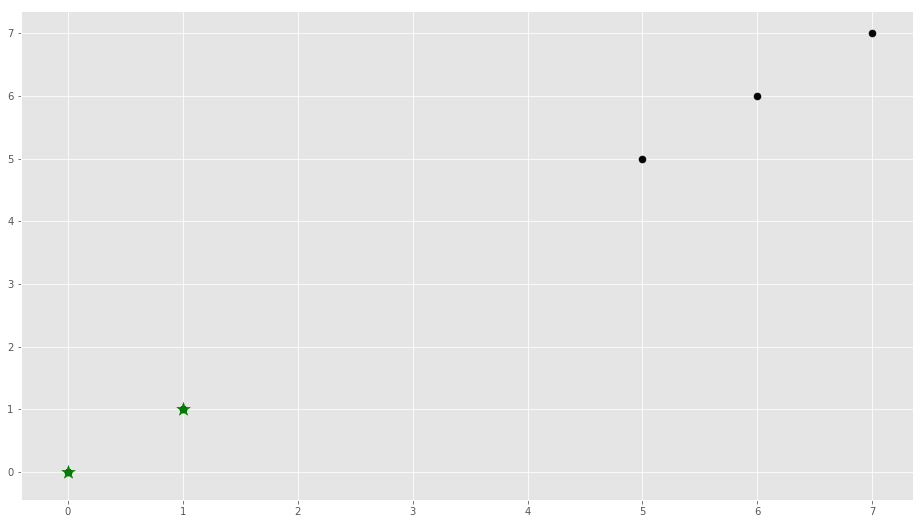

In [113]:

f1 = data[:, 0]
f2 = data[:, 1]
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='#050505', s=50)

# Number of clusters
k = 2
# X coordinates of first cluster
C_x = np.array([0, 1])
# Y coordinates of second cluster
C_y = np.array([0, 1])
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

plt.scatter(C_x, C_y, marker='*', s=200, c='g')

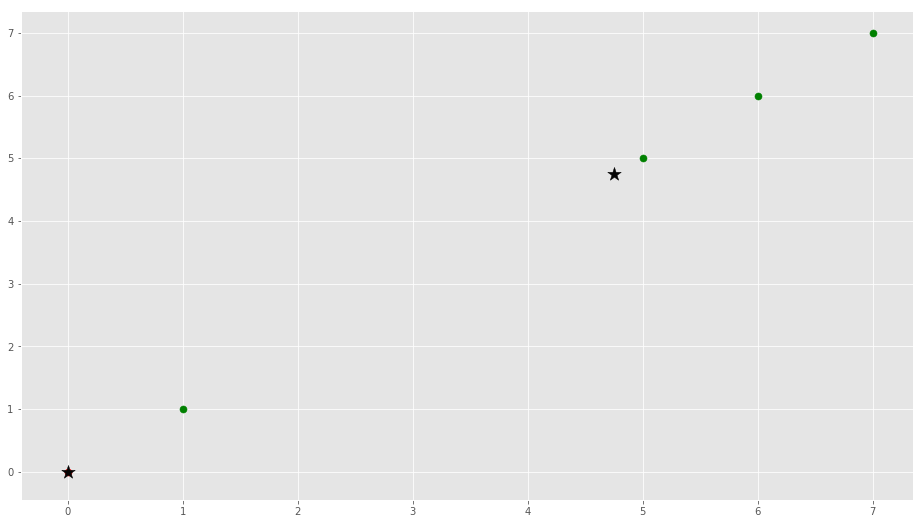

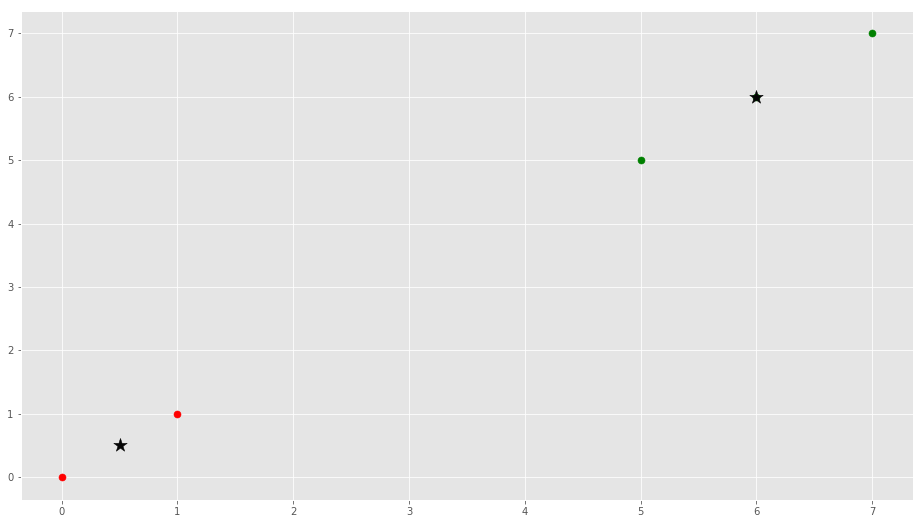

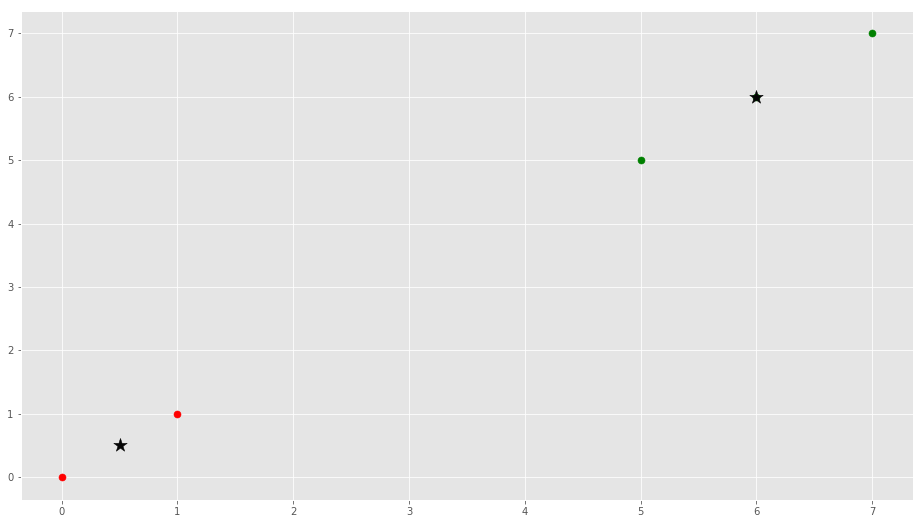

In [114]:
# To store the value of centroids when it updates
colors = ['r', 'g', 'b', 'y', 'c', 'm']


C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
#     print ("iteration")
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    fig, ax = plt.subplots()
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        p = np.array(points)
        ax.scatter(p[:, 0], p[:, 1], s=50, c=colors[i])
    error = dist(C, C_old, None)
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

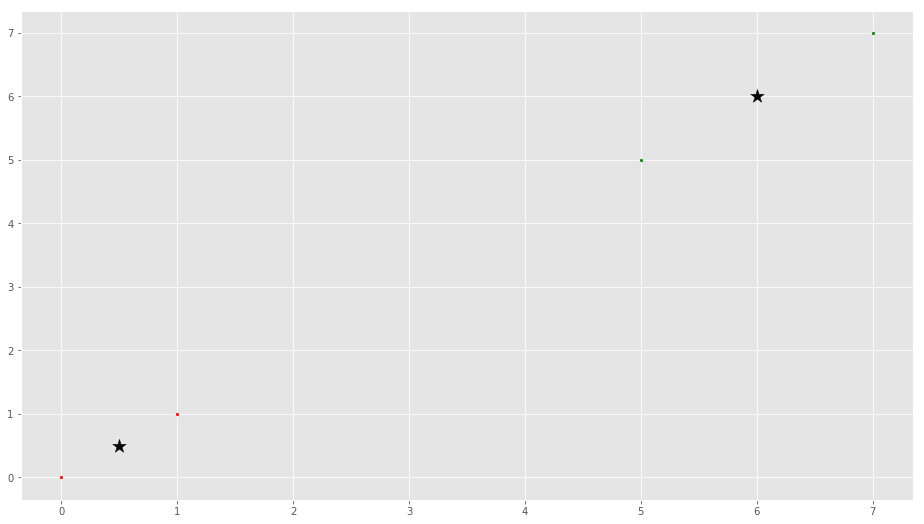

In [63]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')